In [27]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/transformed_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,TotalPurchases,TotalCampaignsAccepted,CmpAccRecency,CampaignMomentum,SpendPerCapita,Tenure,LoyaltyScore,WebPurchasesPerVisit,OnlinePurchases,ImpulseIndex
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,22,0,0,0.0,1617.000000,159,0.332775,1.000000,0.782609,0.507032
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,4,0,0,0.0,9.000000,141,0.185761,0.166667,0.400000,0.218628
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,20,0,0,0.0,388.000000,148,0.386995,1.600000,0.476190,0.400103
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0.0,17.666667,142,0.263716,0.285714,0.285714,0.263250
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,14,0,0,0.0,140.666667,143,0.159874,0.833333,0.533333,0.506961


### Demographics

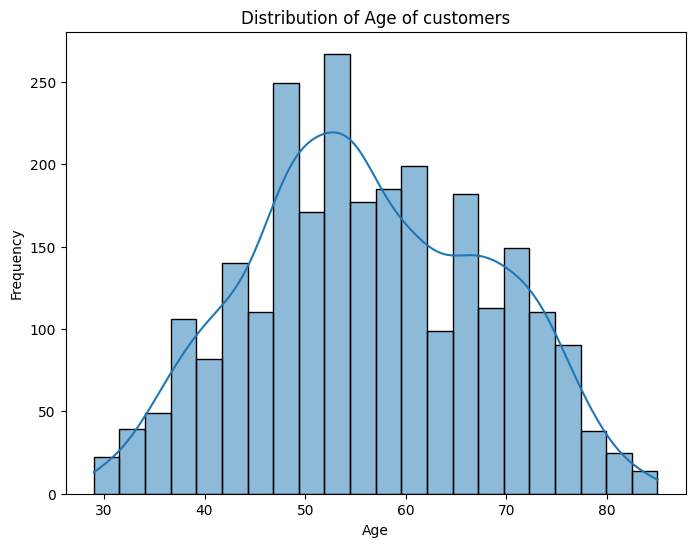

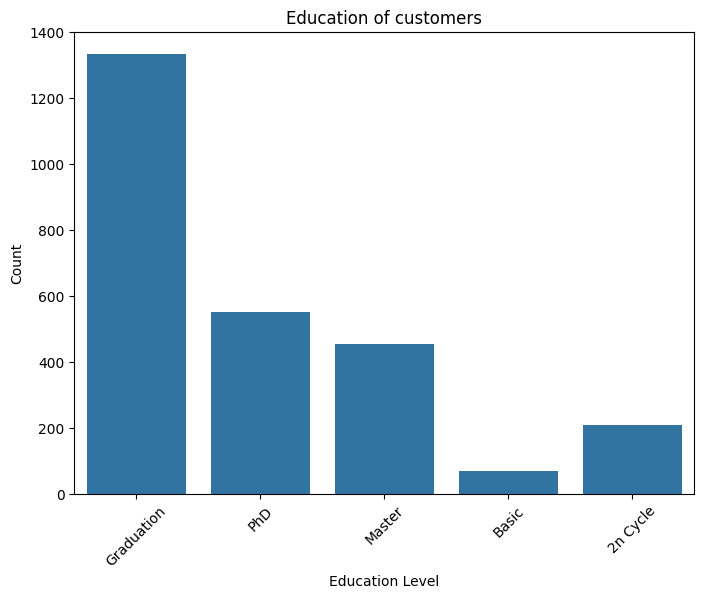

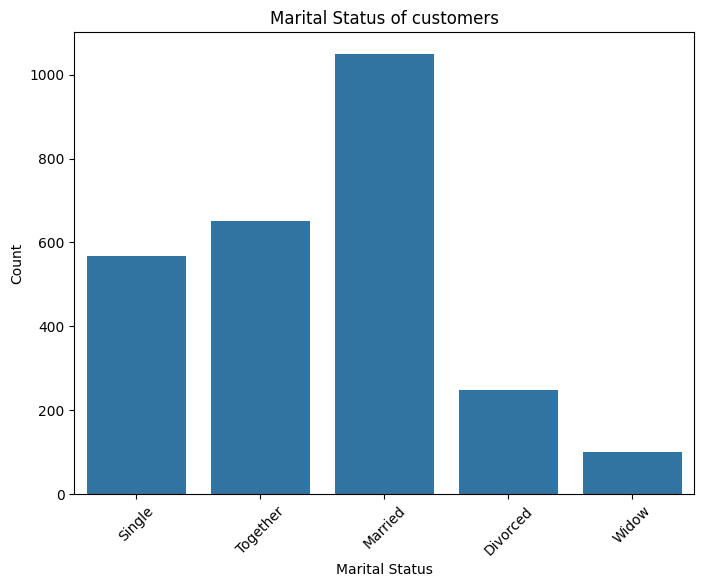

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age of customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=df)
plt.title('Education of customers')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Marital_Status', data=df)
plt.title('Marital Status of customers')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Here are the demographics of our customers. All are established adults as the ages are mostly between 30 and 80. 65% of them are in couples. And most of them have an education with a good bunch having a higher education.

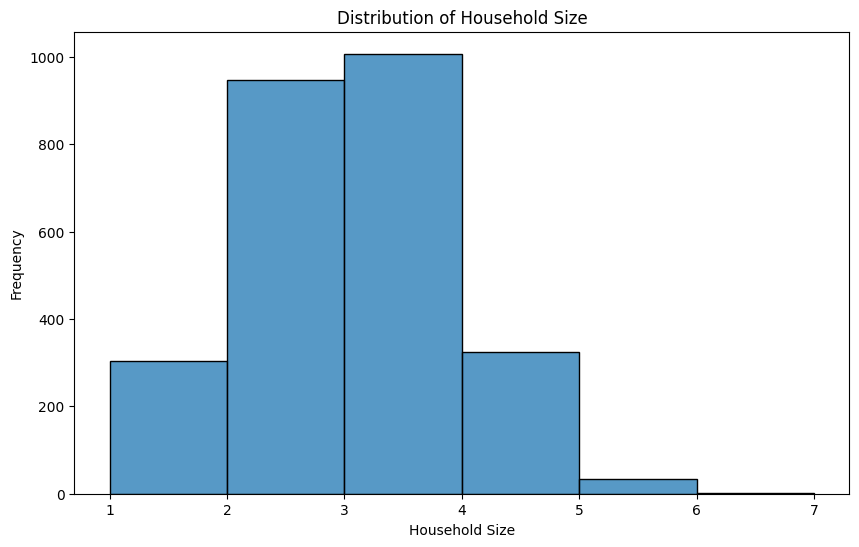

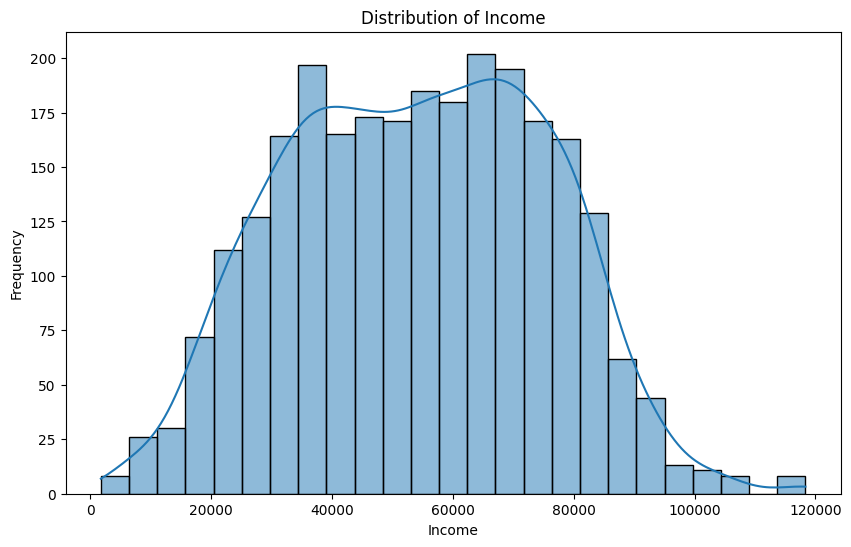

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Household_Size'], kde=False, bins=range(int(df['Household_Size'].min()), int(df['Household_Size'].max()) + 2))
plt.title('Distribution of Household Size')
plt.xlabel('Household Size')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


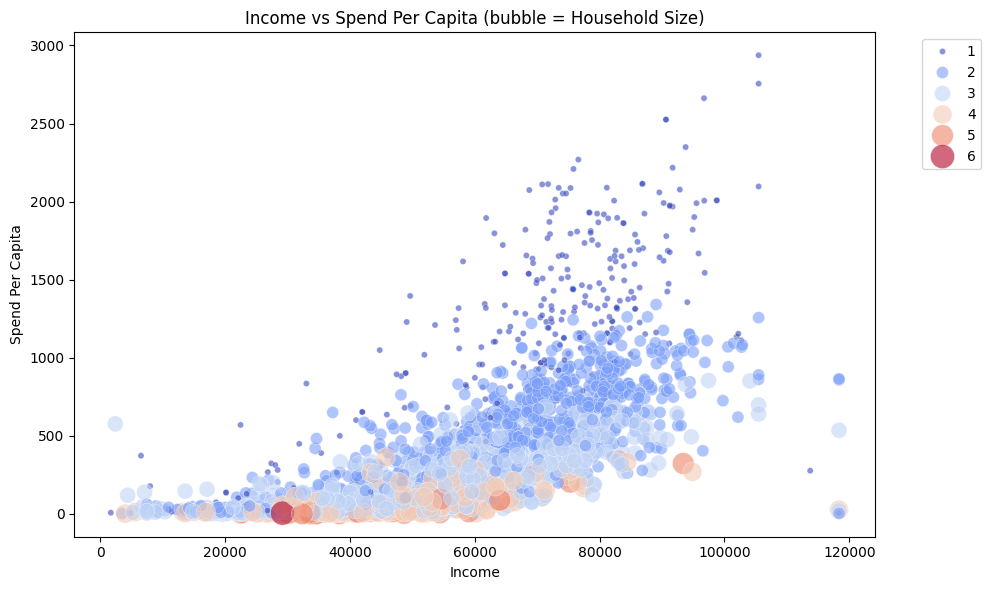

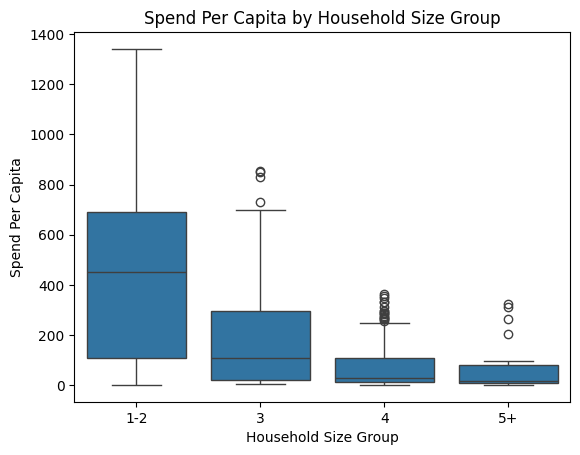

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Income',
    y='SpendPerCapita',
    size='Household_Size',
    hue='Household_Size',
    sizes=(20, 300),
    palette='coolwarm',
    alpha=0.6
)
plt.title('Income vs Spend Per Capita (bubble = Household Size)')
plt.xlabel('Income')
plt.ylabel('Spend Per Capita')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

df['HH_Size_Bin'] = pd.cut(df['Household_Size'], bins=[1,2,3,4,6], labels=['1-2','3','4','5+'])

sns.boxplot(x='HH_Size_Bin', y='SpendPerCapita', data=df)
plt.title('Spend Per Capita by Household Size Group')
plt.xlabel('Household Size Group')
plt.ylabel('Spend Per Capita')
plt.show()

Based on these graphs, it looks like the larger the household the less customers are spending per person on average. But of course a higher income usualy leads to higher spend per capita. This is more clear for lower household sizes but it still present for high household sizes; a more diverse household means more diverse tastes so these families could be shopping at other stores than ours.

### Spending Behavior

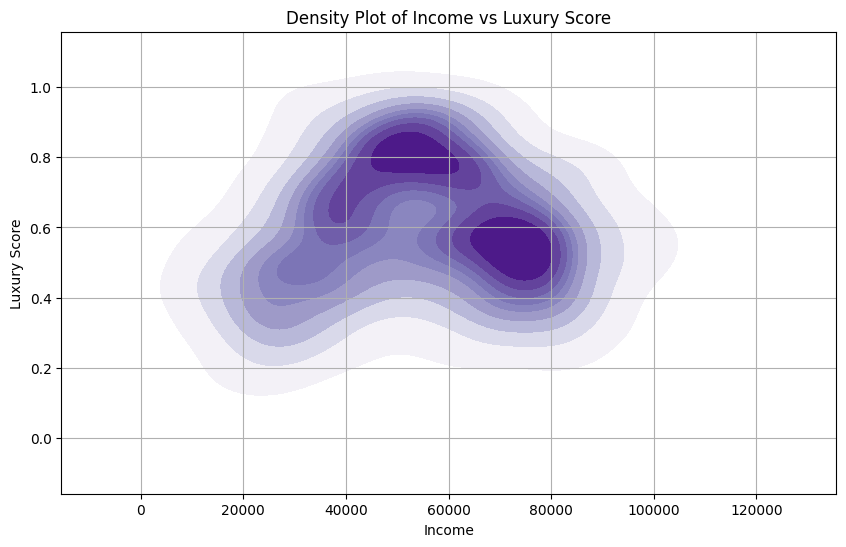

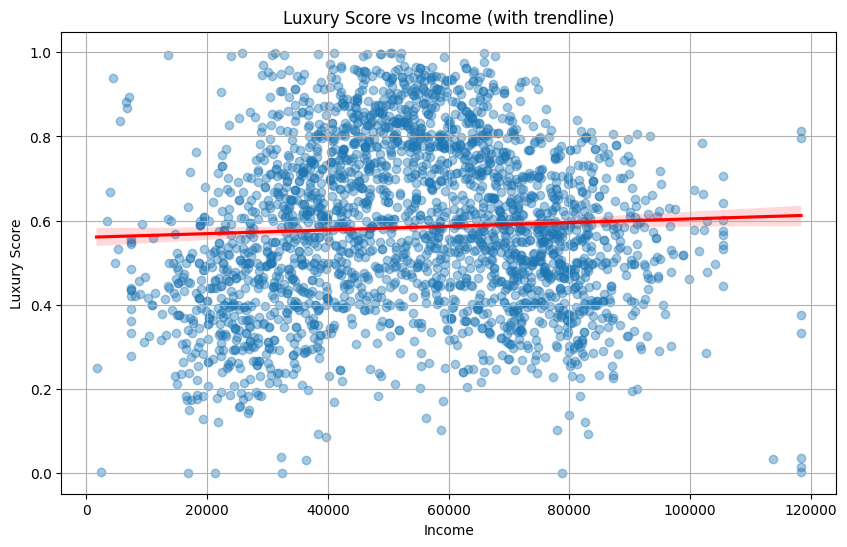

In [31]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='Income', y='LuxuryScore', fill=True, cmap='Purples', thresh=0.05)
plt.title('Density Plot of Income vs Luxury Score')
plt.xlabel('Income')
plt.ylabel('Luxury Score')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Income', y='LuxuryScore', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Luxury Score vs Income (with trendline)')
plt.xlabel('Income')
plt.ylabel('Luxury Score')
plt.grid(True)
plt.show()

Now it is clear that we have some clusters and a trendline that would make sense (more income more luxury) but let's eliminate the outliers so we can get a better insight.

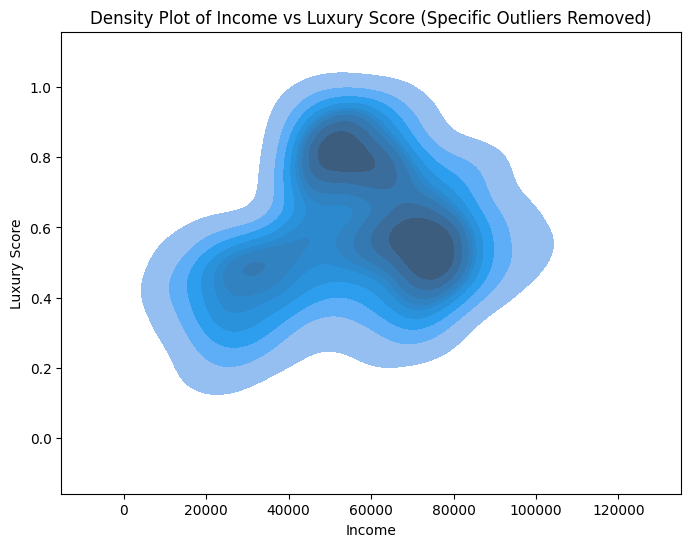

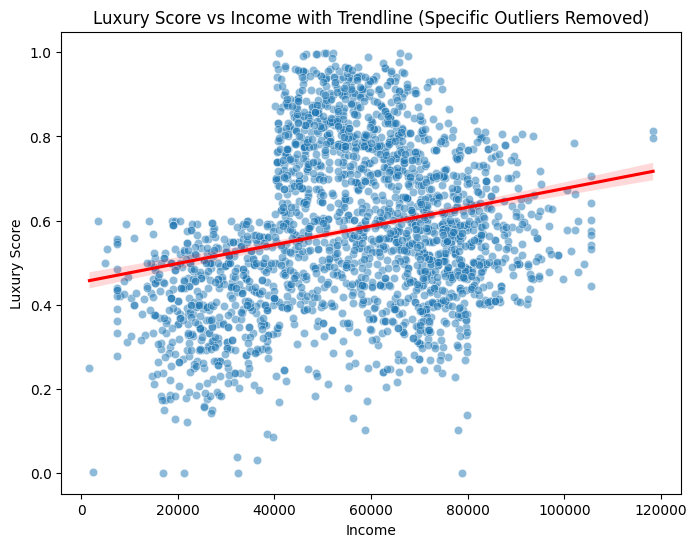

In [32]:
low_income_high_luxury = (df['Income'] < 40000) & (df['LuxuryScore'] > 0.6)
high_income_low_luxury = (df['Income'] > 80000) & (df['LuxuryScore'] < 0.4)

df_filtered = df[~(low_income_high_luxury | high_income_low_luxury)]

plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_filtered, x='Income', y='LuxuryScore', fill=True)
plt.title('Density Plot of Income vs Luxury Score (Specific Outliers Removed)')
plt.xlabel('Income')
plt.ylabel('Luxury Score')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filtered, x='Income', y='LuxuryScore', alpha=0.5)
sns.regplot(data=df_filtered, x='Income', y='LuxuryScore', scatter=False, color='red')
plt.title('Luxury Score vs Income with Trendline (Specific Outliers Removed)')
plt.xlabel('Income')
plt.ylabel('Luxury Score')
plt.show()

Based on these two graphs we can see that there is a large group of middle income customers that try to buy more luxourius items than most other cutomers of all incomes. More wealthy customers overall tend to have more luxurious spending behaviour but they do not reach the level of that middle income group we talked about. This could be because wealthy people tend to be smarter in what they buy while middle income customers will try to look richer, and this group could be targeted for future marketing strategies. Finally lower income customers do not have a high luxury index which is very understandable.

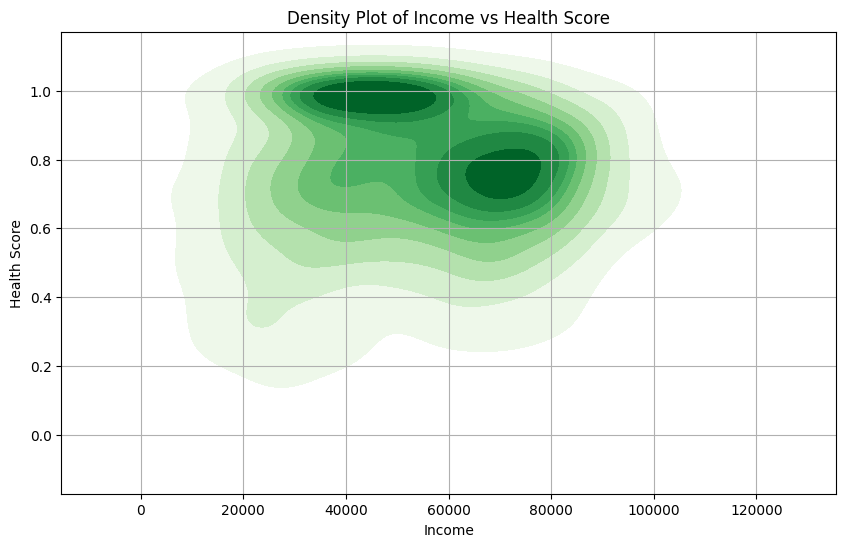

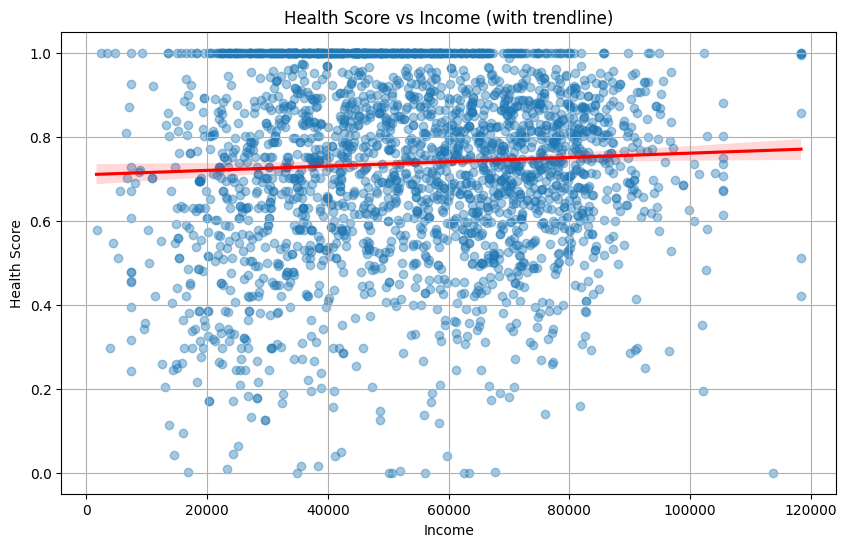

In [33]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='Income', y='HealthScore', fill=True, cmap='Greens', thresh=0.05)
plt.title('Density Plot of Income vs Health Score')
plt.xlabel('Income')
plt.ylabel('Health Score')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Income', y='HealthScore', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Health Score vs Income (with trendline)')
plt.xlabel('Income')
plt.ylabel('Health Score')
plt.grid(True)
plt.show()

Here this shows that income does not really dictate how healthy are your groceries, maybe with more data this could be clearer (for example the quality of the products). Let's try something else...

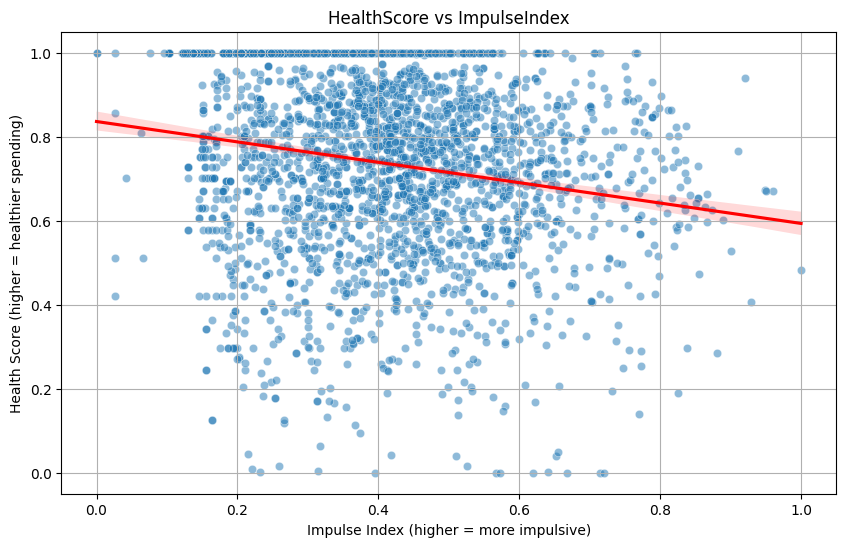

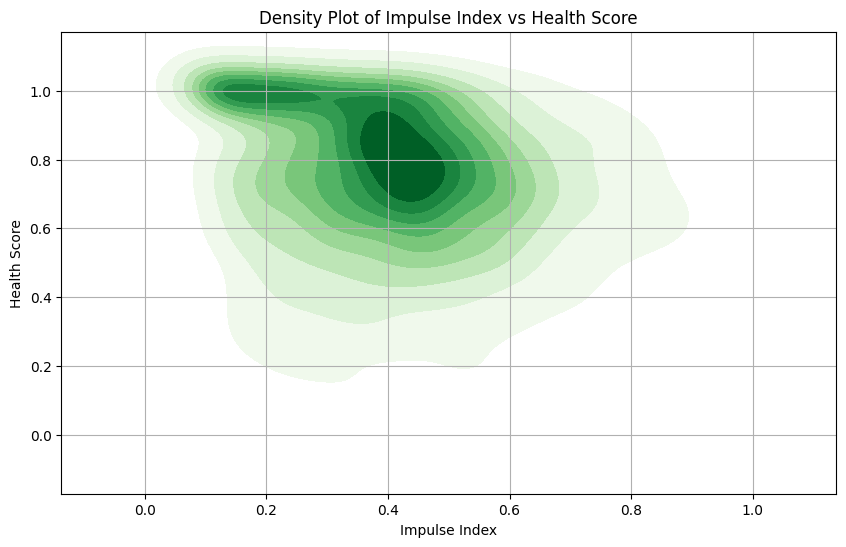

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='ImpulseIndex', y='HealthScore', alpha=0.5)
sns.regplot(data=df, x='ImpulseIndex', y='HealthScore', scatter=False, color='red')
plt.title('HealthScore vs ImpulseIndex')
plt.xlabel('Impulse Index (higher = more impulsive)')
plt.ylabel('Health Score (higher = healthier spending)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='ImpulseIndex', y='HealthScore', fill=True, cmap='Greens', thresh=0.05)
plt.title('Density Plot of Impulse Index vs Health Score')
plt.xlabel('Impulse Index')
plt.ylabel('Health Score')
plt.grid(True)
plt.show()

This plot is very insightful! As it shows healthy customers tend to be less impulsive. Maybe this means that we do not need to have as high a marketing effort for healthy products as others!

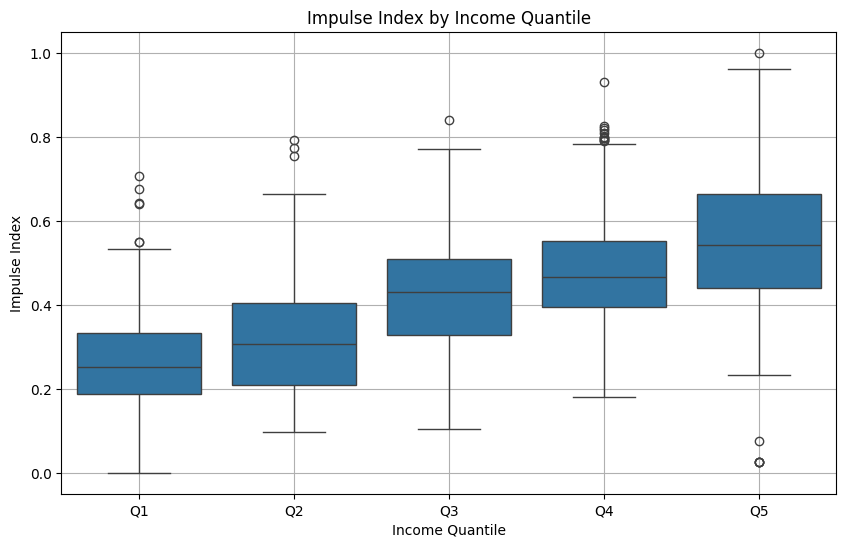

In [35]:
df_temp = pd.DataFrame()
df_temp['Income_Bin'] = pd.qcut(df['Income'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
df_temp['ImpulseIndex'] = df['ImpulseIndex']

plt.figure(figsize=(10,6))
sns.boxplot(x='Income_Bin', y='ImpulseIndex', data=df_temp)
plt.title('Impulse Index by Income Quantile')
plt.xlabel('Income Quantile')
plt.ylabel('Impulse Index')
plt.grid(True)
plt.show()

Now this graph shows that with more income, customers tend to be more impulsive as they probably do not restraint themselves to buy things they like. But the impulse index has Number of deals purchased as input which surprises me as to why lower income customers do not have a higher impulse index. 

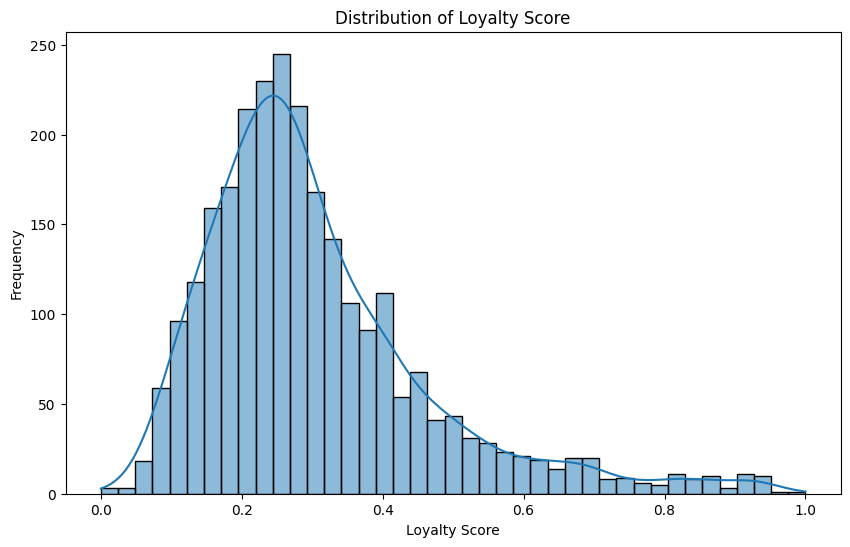

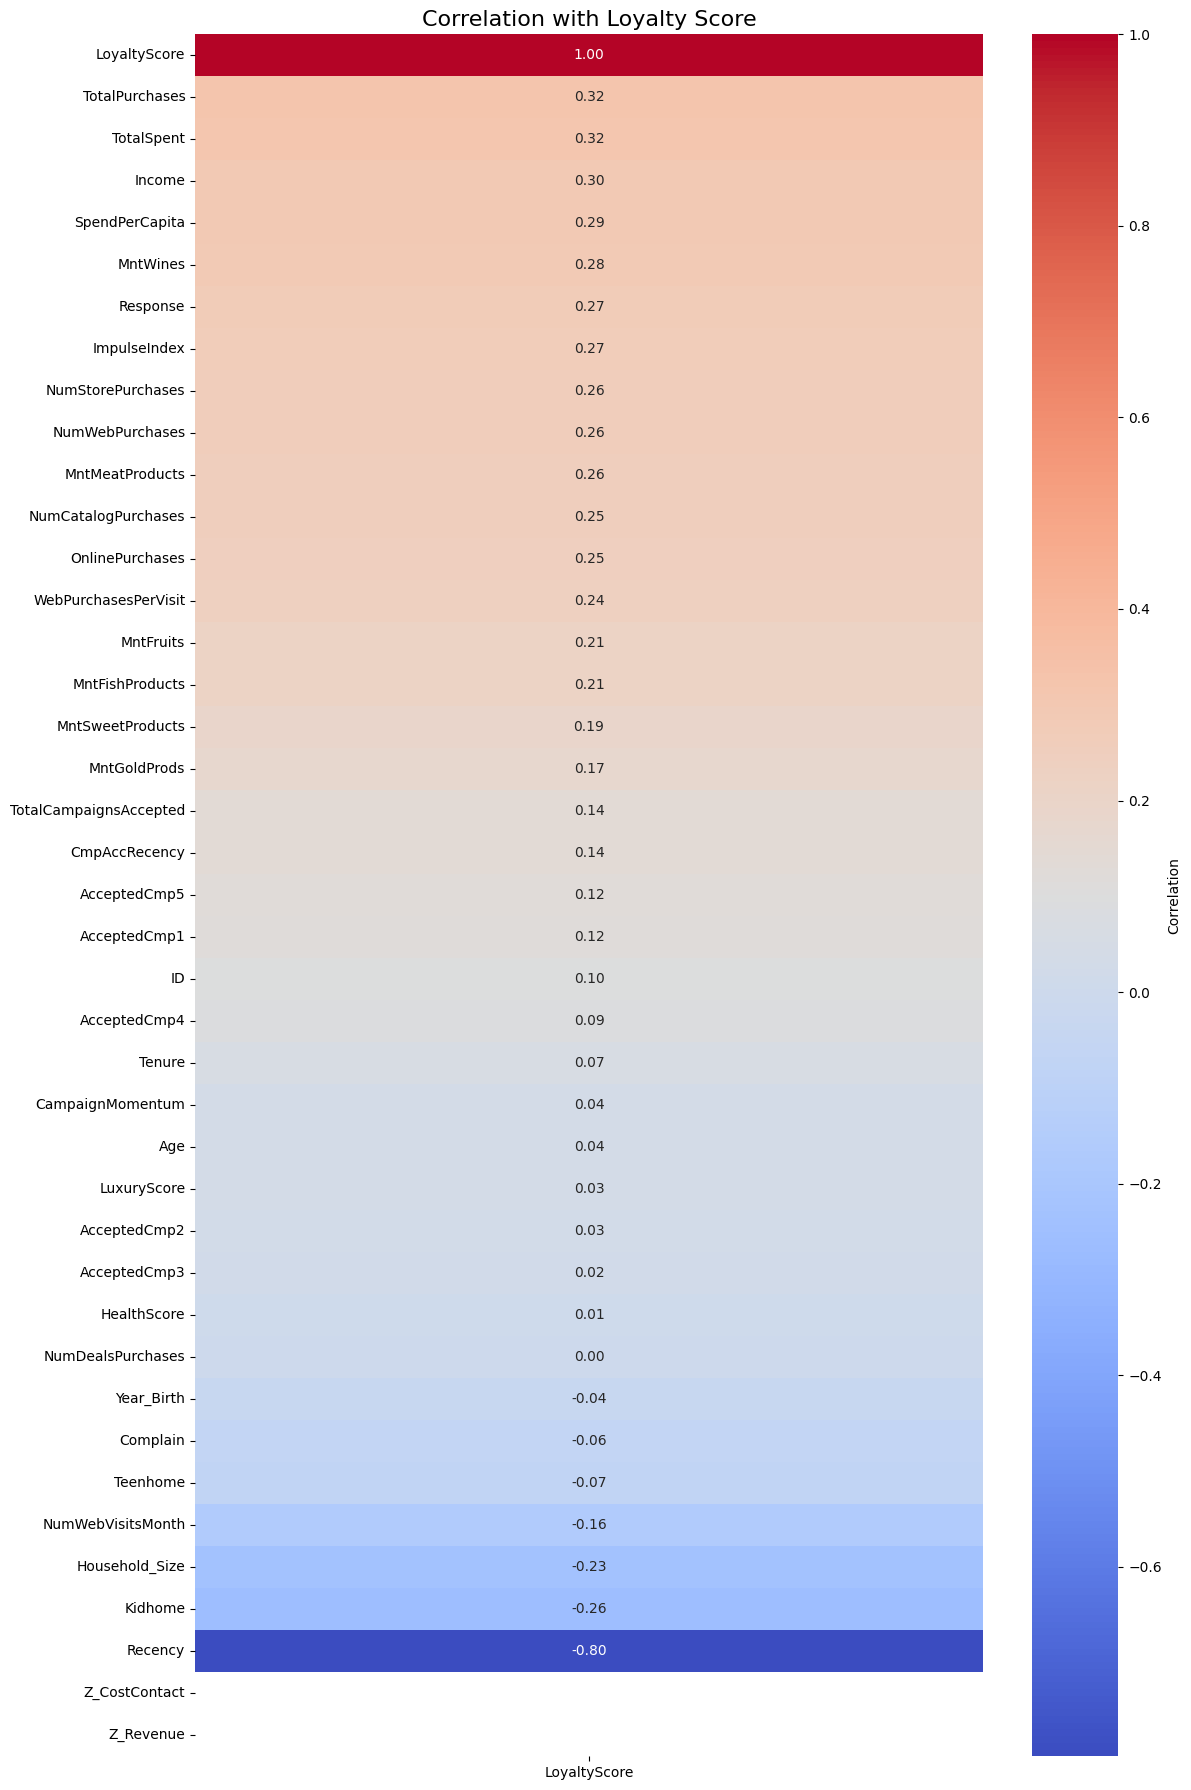

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df['LoyaltyScore'], kde=True)
plt.title('Distribution of Loyalty Score')
plt.xlabel('Loyalty Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 18)) 
sns.heatmap(
    df.corr(numeric_only=True)[['LoyaltyScore']].sort_values(by='LoyaltyScore', ascending=False),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar_kws={'label': 'Correlation'}
)
plt.title('Correlation with Loyalty Score', fontsize=16)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout() 
plt.show()


Obviously we cannot expect that all of our customers are loyal but we can try and see which group customers is (to try and keep them) and which group of customers might not be so we can try and make them come to our shop more. Based on the correlation matrix and carefully choosing insightful columns:

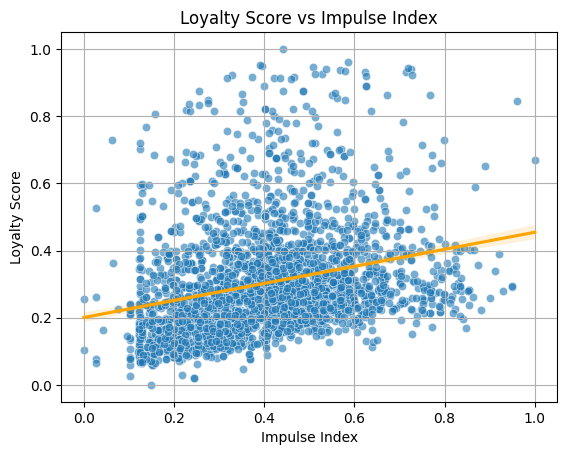

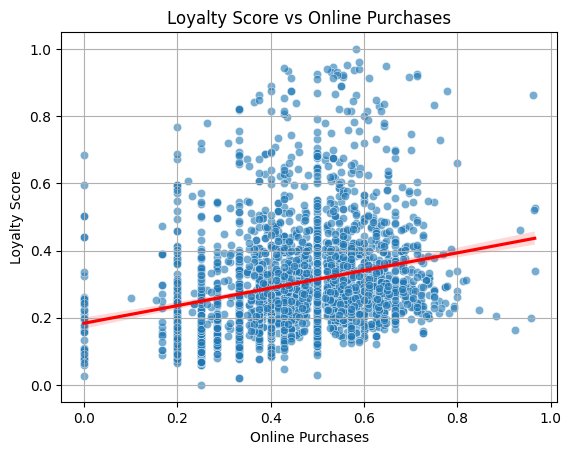

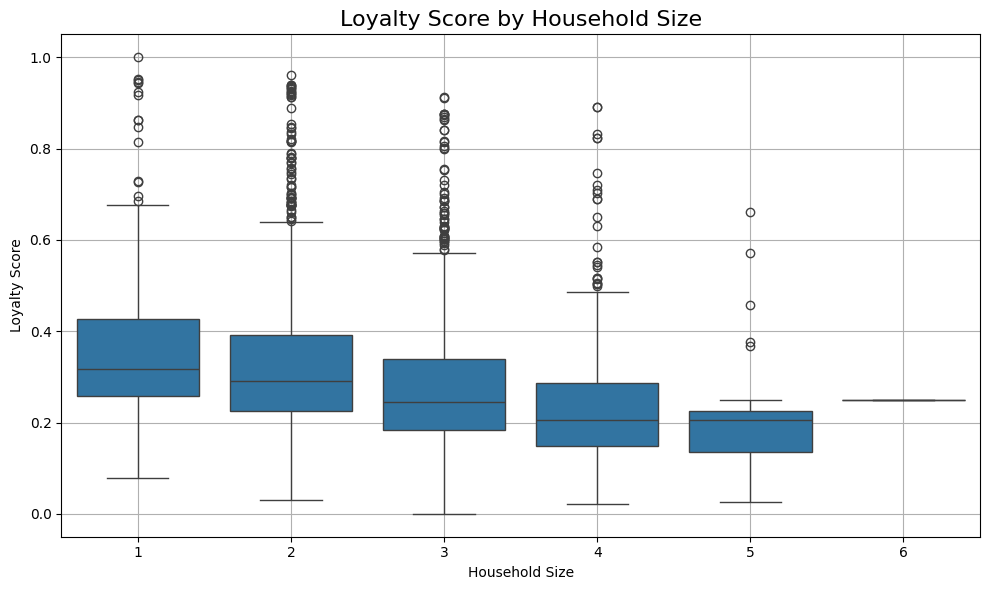

In [37]:
sns.scatterplot(data=df, x='ImpulseIndex', y='LoyaltyScore', alpha=0.6)
sns.regplot(data=df, x='ImpulseIndex', y='LoyaltyScore', scatter=False, color='orange')
plt.title('Loyalty Score vs Impulse Index')
plt.xlabel('Impulse Index')
plt.ylabel('Loyalty Score')
plt.grid(True)
plt.show()

sns.scatterplot(data=df, x='OnlinePurchases', y='LoyaltyScore', alpha=0.6)
sns.regplot(data=df, x='OnlinePurchases', y='LoyaltyScore', scatter=False, color='red')
plt.title('Loyalty Score vs Online Purchases')
plt.xlabel('Online Purchases')
plt.ylabel('Loyalty Score')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Household_Size', y='LoyaltyScore')
plt.title('Loyalty Score by Household Size', fontsize=16)
plt.xlabel('Household Size')
plt.ylabel('Loyalty Score')
plt.grid(True)
plt.tight_layout()
plt.show()


Here we can see that impulse buyers are actually loyal, because since they trust us they are more vulnerable to accept deals. Also online customers are loyal we can therefore try to encourage our customers to use online features of our store. And finally we can see large household sizes are less loyal which led us to think that making more family deals could help attract more large households customers.

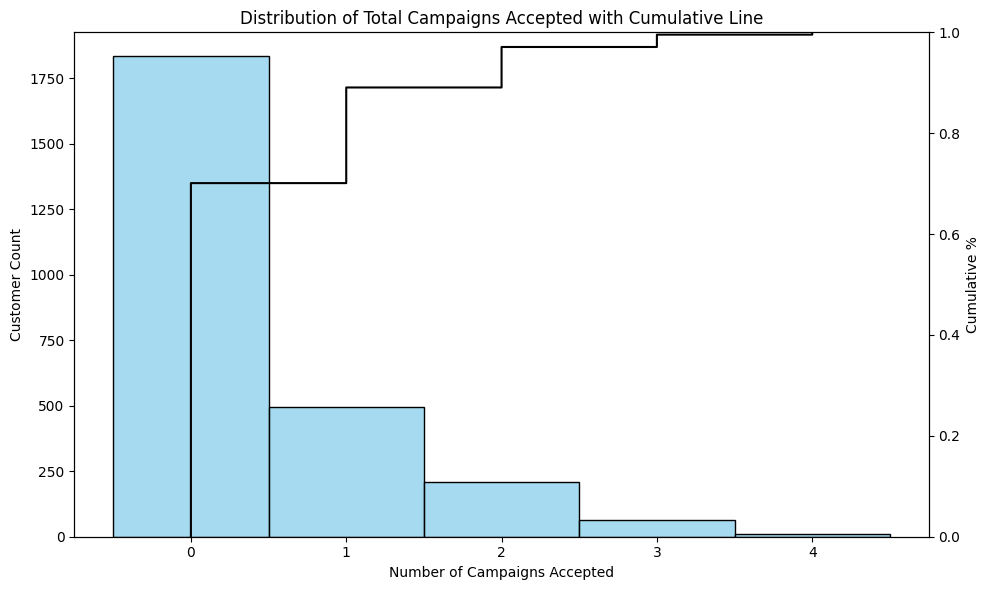

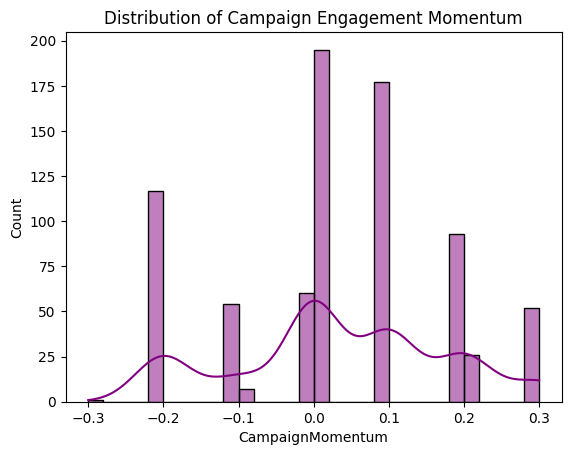

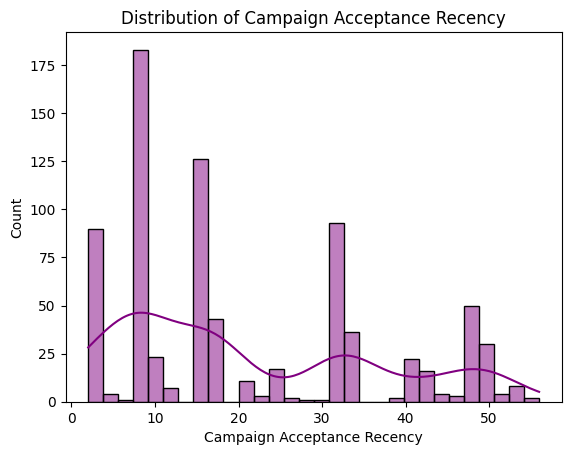

In [38]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.histplot(df['TotalCampaignsAccepted'], discrete=True, bins=6, ax=ax1, color='skyblue')
ax2 = ax1.twinx()
sns.ecdfplot(df['TotalCampaignsAccepted'], ax=ax2, color='black')
ax1.set_title('Distribution of Total Campaigns Accepted with Cumulative Line')
ax1.set_xlabel('Number of Campaigns Accepted')
ax1.set_ylabel('Customer Count')
ax2.set_ylabel('Cumulative %')
plt.tight_layout()
plt.show()

df_temp = pd.DataFrame()
df_temp['CampaignMomentum'] = df['CampaignMomentum'][df['TotalCampaignsAccepted'] > 0]
df_temp['CmpAccRecency'] = df['CmpAccRecency'][df['TotalCampaignsAccepted'] > 0]

sns.histplot(df_temp['CampaignMomentum'], bins=30, kde=True, color='purple')
plt.title('Distribution of Campaign Engagement Momentum')
plt.xlabel('CampaignMomentum')
plt.show()

sns.histplot(df_temp['CmpAccRecency'], bins=30, kde=True, color='purple')
plt.title('Distribution of Campaign Acceptance Recency')
plt.xlabel('Campaign Acceptance Recency')
plt.show()

The Cammpaign Acceptance Recency graph shows that most customers either don’t engage with campaigns or engage with earlier ones, with later campaigns seeing lower acceptance while the Campaign Momentum graph shows mixed engagement trends—some customers increase engagement over time, others decrease, but most show no clear trend. Together, these suggest that we should more effort in those campaigns but since we do not have much data more fruitful insights cannot be made on how to do so.